# Normalización y generación de datos sintéticos

## Normalización

está la normalización min-max la cúal se obtiene de la siguiente forma

$$ v_{norm}=a+\frac{(v_i -v_{min})(b-a)}{v_{max}-v_{min}} $$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

C:\Users\aldoa\anaconda3\envs\env2\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def norm_min_max(x,a,b): # Para todo el dataFrame
    l=list(x.columns)
    v_max=0
    v_min=0
    res=pd.DataFrame()
    for val in l:
        v_max=x[val].max()
        v_min=x[val].min()
        r_dt=v_max-v_min
        r_norm=b-a
        d=x[val]-v_min
        dpct=d/r_dt
        dnorm=r_norm*dpct
        data=a+dnorm
        aa=pd.DataFrame(data,columns=[val])
        res[val]=data
    return res


In [3]:
database=pd.read_csv("C:\\Users\\aldoa\\Machine Learning\\Practica 1 datos tabulares\\Database_mejorada.csv")
database.columns

Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall', 'marital_Status',
       'education'],
      dtype='object')

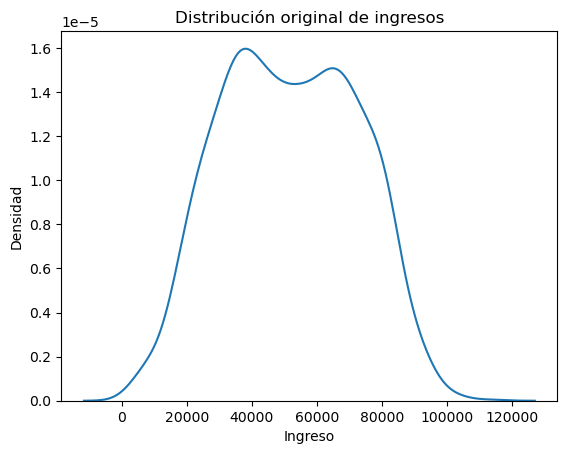

In [4]:
sns.kdeplot(database['Income'])
plt.title('Distribución original de ingresos')
plt.ylabel('Densidad')
plt.xlabel('Ingreso')
plt.show()

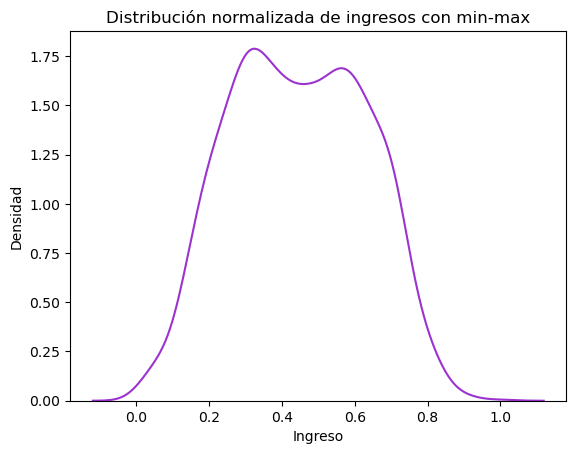

In [5]:
norm1=norm_min_max(database[['Income']],0,1)
sns.kdeplot(norm1['Income'],color='#9C33D0')
plt.title('Distribución normalizada de ingresos con min-max')
plt.ylabel('Densidad')
plt.xlabel('Ingreso')
plt.show()

## Normalización Z-score

Normaliza de una manera que los valores se encuentren en una media de 0 y una desviación estandar de 1. La fórmula es:

$$v_{norm}=\frac{v_i -\bar{v}}{\sigma_v} $$
donde: 
* $\bar{v}=\mu_v$ es la media de los datos
* $\sigma_v$ es la desviación estandar de los datos

Tiene la ventaja de poder expresar "consistencia":

**Ejemplo:** Tenemos dos series de notas correspondientes a dos asignaturas
diferentes de un grupo de alumnos:

4 5 5 6 7 8 7 7 6 6 7 5 9 1 0 8 6 7 8 3 8 7

1 5 6 3 2 0 6 7 9 8 1 0 1 3 5 3 4 7 8 3 2 4

$\mu_1$=6.61 , $\sigma_1$=1.65

$\mu_2$=4.61 , $\sigma_2$=2.81

Si quisiéramos saber si el segundo sujeto (comenzando por la derecha) que ha
calificado con 5 en ambas asignaturas ha sacado una puntuación equivalente
tendríamos que estandarizar ambas calificaciones:

<div style="background-color:#CCCCCC ">$$  
\begin{matrix}
z_1=\frac{5-6.61}{1.65}=-1 & z_2=\frac{5-4.61}{2.81}=0.01
\end{matrix}
$$</div>

Como vemos ambas calificaciones no son equivalentes, pues mientras un 5 en la
primera asignatura tiene por encima el 76% de las calificaciones de la clase. En
la otra asignatura es una medida muy cercana a la media de la clase.

***



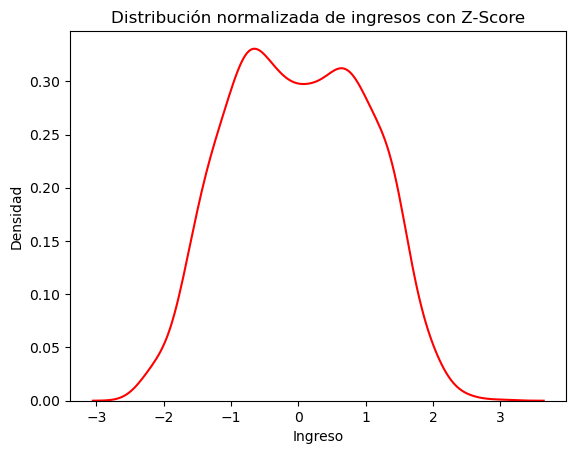

In [6]:
# Entonces para la gráfica de ingreso se tiene:
def z_score(db):
    media=db.mean()
    dstd=db.std()
    return (db-media)/dstd
db2=database.copy()
norm2=z_score(db2['Income'])
sns.kdeplot(norm2,color='red')
plt.title('Distribución normalizada de ingresos con Z-Score')
plt.ylabel('Densidad')
plt.xlabel('Ingreso')
plt.show()

## Normalización con sigmoide

Esta normalización se basa en el calculo de la sigmoide centrada en la media y con la desviación estandar como variable
Entonces se calcula mediante:

$$v_{norm}=\frac{1}{1+e^{-\frac{v_i - \bar{v}}{\sigma_v}}}$$

Teniendo variantes como la utilización de una previa normalización min max para asegurar que se encuentre entre 0 y 1 para ingresarlo directamente

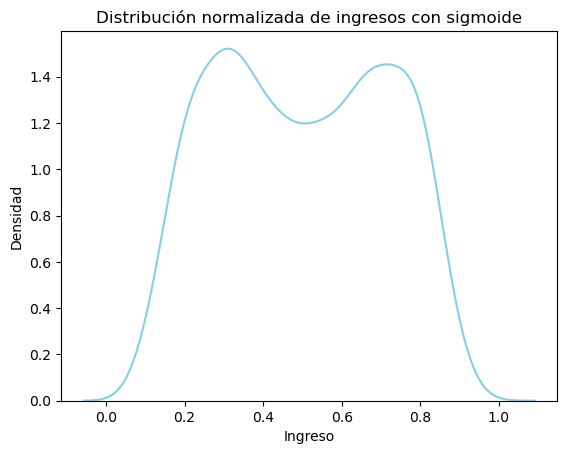

0.4998125344861291


In [7]:
def sigmoid(db):
    media=db.mean()
    dstd=db.std()
    return 1/(1+np.exp(-((db-media)/(dstd))))

db3=database.copy()
norm3=norm_min_max(db3[['Income']],0,1)
norm3=sigmoid(norm3['Income'])
sns.kdeplot(norm3,color='#87CEEB')
plt.title('Distribución normalizada de ingresos con sigmoide')
plt.ylabel('Densidad')
plt.xlabel('Ingreso')
plt.show()
print(norm3.mean())

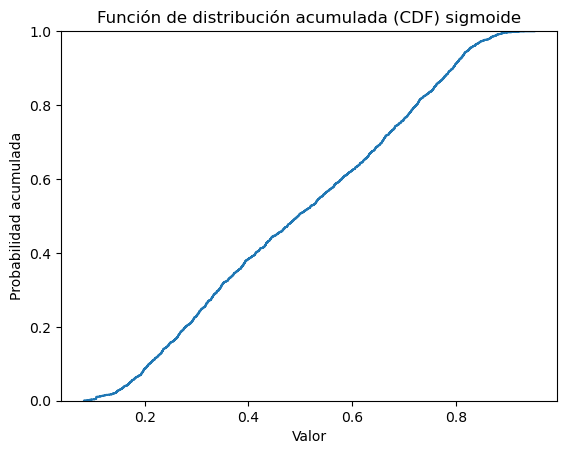

In [8]:
sns.ecdfplot(norm3)
plt.xlabel('Valor')
plt.ylabel('Probabilidad acumulada')
plt.title('Función de distribución acumulada (CDF) sigmoide')

# Mostramos la gráfica
plt.show()





## Generación de datos sintéticos

[fuente (smote1.1)](https://www.mphasis.com/content/dam/mphasis-com/global/en/home/innovation/next-lab/Mphasis_Data-Augmentation-for-Tabular-Data_Whitepaper.pdf)

[towards data science](https://medium.com/analytics-vidhya/data-augmentation-for-tabular-data-f75c94398c3e)

[smote1.2](https://towardsdatascience.com/smote-fdce2f605729)

# Generación de datos sinteticos con SMOTE
 
Primeramente se debe conocer la cantidad de valores que se requieren añadir, se debe conocer la cantidad de valores necesarios para equilibrar la clase, esto se realiza mediante el uso de una diferencia entre la cantidad de clases $n_{total}=n_{c=1}-n_{c=0}$. Donde se categoriza como clase 1 la clase mayoritaria y 0 la clase minoritaria.

## SMOTE v1 
Entonces para esta primer parte, se tendrán dos puntos aleatorios y se les sacará la distancia, para finalmente aplicar la formula:

$$v_{SMOTE_i}=v_{a_1}+(P(x)\times(v_{a_2}-v_{a_1})) $$
donde $P(x): \mathbb{R}\in [0,1]$ en este caso una función uniforme.

## SMOTE basado en K-NN
El procedimiento es similar, siguiendo los siguientes pasos:

1. Seleccionar un valor aleatorio de la clase minoritaria
2. aplicar algún metodo de distancia con respecto a todos los demás puntos de la clase (euclidiana, Manhattan, Gower), esta última se utiliza cuando se tienen valores tanto categoricos como continuos aparte del objetivo.
3. Ordenar las distancias de menor a mayor y obtener las primeras k distancias menores (sin contar consigo mismo).
4. Seleccionar aleatoriamente una de las k distancias menores.
5. Aplicar la función:

$$v_{SMOTE_i}=v_{a_1}+(P(x)\times(v_{\min(k_{sel})}-v_{a_1})) $$
donde $P(x): \mathbb{R}\in [0,1]$ en este caso una función uniforme.

Se aplicó la distancia euclidiana definida como:
$$|n|=\sqrt{x_{i}-y_{i}} $$

La Gower como [distancia gower](https://www.tandfonline.com/doi/full/10.1080/03610918.2017.1367806?scroll=top&needAccess=true&role=tab), tomando en cuenta que hay valores tanto categoricos como continuos (datos mezclados):

$$S(x_{il}(t),x_{jl}(t))= \frac{\sum \delta_{ijl}(t)S_{ijl}(t)}{\sum \delta_{ijl}(t)} $$


donde $S_{ijl}(t)$ indica la similaridad para la $l$-ésima caracteristica entre dos objetos y $\delta_{ijl}(t) \in [0,1]$ es un coeficiente basado en la posibilidad de que la medida de dos objetos se pierde en el tiempo t. Para variables discretas (incluyendo binarias), el componente de similitud se obtiene como:

$$ 
S_{ijl}(t)= \left\{ \begin{array}{lcc}
             1 &   si  & x_{il}(t) = x_{jl}(t) \\
             \\ 0 &  si & x_{il}(t) \neq x_{jl}(t) \\
             \end{array}
   \right.
$$
Para datos continuos:
$$S_{ijl}(t)=1-\frac{|x_{il}(t)-x_{jl}(t)|}{R_{l}(t)} $$

Donde $R_{l}(t)$ es el rango de la $l$-ésima variable en el tiempo $t$ sobre todos los objetos escritos como $R_{l}(t)=\max_{m}X_{ml}(t)-\min_{m}X_{ml}(t)$. Correspondiente a la disimilaridad medida que puede ser obtenida o simplemente usando $D(x_i,x_j)=1-S(x_i,x_j)$ ...

In [9]:
data = [[0.2, 0.4, 0], [0.3, 0.5, 0], [0.4, 0.5, 0], [0.7, 0.9, 1], [0.8, 0.7, 1]]

In [10]:
positive_data = []
negative_data = []

for observation in data:
    if observation[-1] == 1:
        positive_data.append(observation[:-1])
    else:
        negative_data.append(observation[:-1])

In [11]:
print(negative_data)

[[0.2, 0.4], [0.3, 0.5], [0.4, 0.5]]


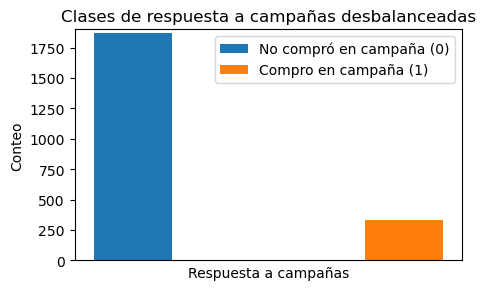

In [12]:
data_p1=database[['MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Response']].copy()
ren,co=data_p1.shape
ncc=[]
cc=[]
for dato in range(ren):
    if data_p1['Response'][dato] == 0:
        ncc.append(0)
    else:
        cc.append(1)
col=['No compró en campaña (0)','Compro en campaña (1)']
plt.figure(figsize=(5,3))
plt.hist([ncc,cc],bins=2,label=col)
plt.xlabel('Respuesta a campañas')
plt.ylabel('Conteo')
plt.axis([0,1,0,1900])
plt.tick_params(bottom=False,labelbottom=False)
plt.legend()
plt.title('Clases de respuesta a campañas desbalanceadas') # modificar si es posible la escala de los valores
c0,c1=data_p1['Response'].value_counts()

In [13]:
n_ds=abs(c0-c1)
print(n_ds)

1539


In [14]:
# smote para valores continuos **********************************
def euc_dis(x1,x2):
    return np.sqrt((x1-x2)**2)

def e_dis_abs(x1,x2):
    #r,c=x1.shape
    x3=(x1-x2)**2
    x3=np.sqrt(sum(x3))
    return x3
        

def smotev1(minclass,val_class,ndg):
    ## Tomar dos valores aleatorios
    re,c=minclass.shape
    sdata=np.zeros((1,c))
    for a in range(ndg):
        sel_rnd=np.random.choice(re,2,replace=False)
        dis=euc_dis(minclass.iloc[sel_rnd[0]],minclass.iloc[sel_rnd[1]])
        sdata=np.vstack((sdata,(minclass.iloc[sel_rnd[0]]+(np.random.uniform(0,1)*
                                                           (minclass.iloc[sel_rnd[1]]-minclass.iloc[sel_rnd[0]])))))
    sdata=np.delete(sdata,0,0)
    df=pd.DataFrame(sdata,columns=minclass.columns)
    df['Response']=val_class
    return df


def smotev2(minclass,val_class,ndg,k):
    ## Tomar dos valores aleatorios
    re,c=minclass.shape
    sdata=np.zeros((1,c))
    #print('antes',sdata.shape)
    for aa in range(ndg):
        sel_rnd=np.random.choice(re,1,replace=False)
        dlist=[]
        
        for b in range(re):
            dlist.append(e_dis_abs(minclass.iloc[sel_rnd[0]],minclass.iloc[b]))
        
        dlist2=sorted(dlist)
        #print(dlist2[1:k+1])
        seleccion=np.random.choice(dlist2[1:k+1],1)
        val=dlist.index(seleccion)
        #print(val[0])
        sdata=np.vstack((sdata,(minclass.iloc[sel_rnd[0]]+(np.random.uniform(0,1)*
                                                           (minclass.iloc[val]-minclass.iloc[sel_rnd[0]])))))
        dlist=[]
        #print(aa)
    sdata=np.delete(sdata,0,0)
    #print(sdata.shape)
    df=pd.DataFrame(sdata,columns=minclass.columns)
    df['Response']=val_class
    return df


In [15]:
min_class=data_p1[data_p1['Response']==1]
max_class=data_p1[data_p1['Response']==0]


In [16]:
#dsint=pd.DataFrame(smotev1(min_class,1,10))
import time
t2=time.time()
dsint=smotev1(min_class,min_class['Response'][0],n_ds)
t1=time.time()
balclass=pd.concat([data_p1,dsint],ignore_index=True)
print(balclass.shape)
print('tiempo de ejecución:',t1-t2)

(3744, 7)
tiempo de ejecución: 0.8290863037109375


Text(0.5, 1.0, 'Clases de respuesta a campañas balanceadas')

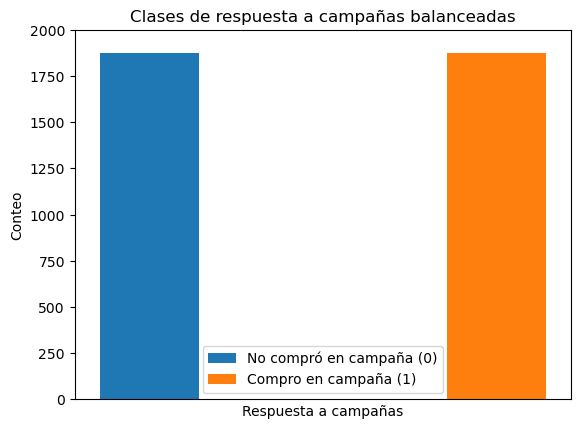

In [17]:
ren,col=balclass.shape
ncc=[]
cc=[]
for dato in range(ren):
    if balclass['Response'][dato] == 0:
        ncc.append(0)
    else:
        cc.append(1)
col=['No compró en campaña (0)','Compro en campaña (1)']
#plt.figure(figsize=(6,3))
plt.hist([ncc,cc],bins=2,label=col)
plt.xlabel('Respuesta a campañas')
plt.ylabel('Conteo')
plt.axis([0,1,0,2000])
plt.tick_params(bottom=False,labelbottom=False)
plt.legend()
plt.title('Clases de respuesta a campañas balanceadas') # modificar si es posible la escala de los valores

Text(0.5, 1.0, 'Distribución de gasto en vinos')

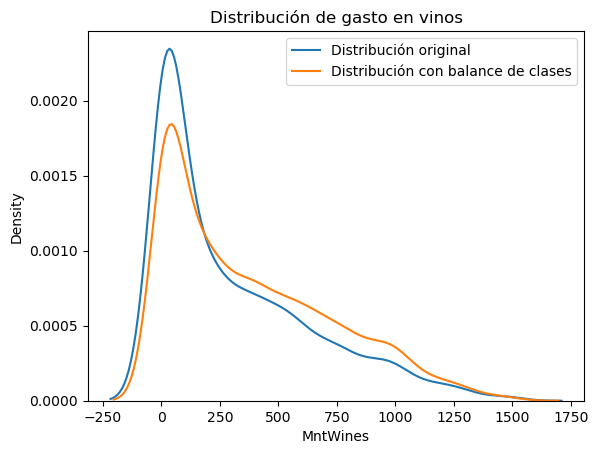

In [18]:
sns.kdeplot(database['MntWines'])
sns.kdeplot(balclass['MntWines'])
plt.legend(['Distribución original','Distribución con balance de clases'])
plt.title('Distribución de gasto en vinos')

Text(0.5, 1.0, 'Distribución de gasto en frutas')

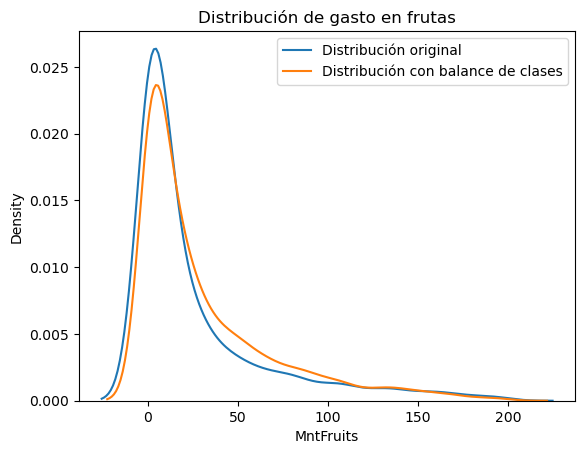

In [19]:
sns.kdeplot(database['MntFruits'])
sns.kdeplot(balclass['MntFruits'])
plt.legend(['Distribución original','Distribución con balance de clases'])
plt.title('Distribución de gasto en frutas')



Text(0.5, 1.0, 'Distribución de gasto en carnes')

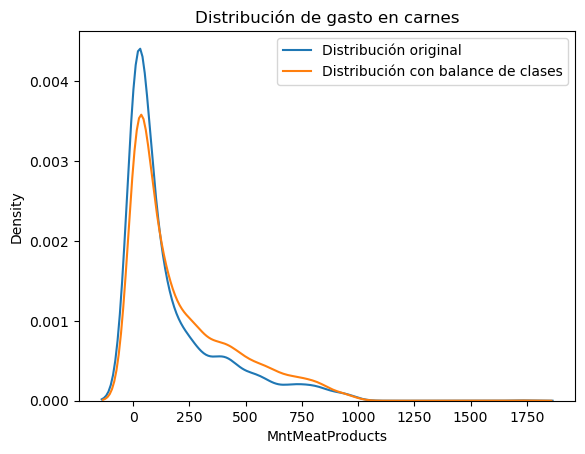

In [20]:
sns.kdeplot(database['MntMeatProducts'])
sns.kdeplot(balclass['MntMeatProducts'])
plt.legend(['Distribución original','Distribución con balance de clases'])
plt.title('Distribución de gasto en carnes')

Text(0.5, 1.0, 'Distribución de gasto en dulces')

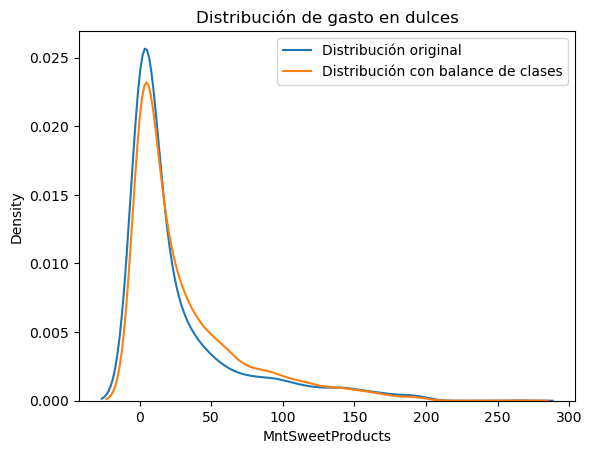

In [21]:
sns.kdeplot(database['MntSweetProducts'])
sns.kdeplot(balclass['MntSweetProducts'])
plt.legend(['Distribución original','Distribución con balance de clases'])
plt.title('Distribución de gasto en dulces')

Text(0.5, 1.0, 'Distribución de gasto en joyería')

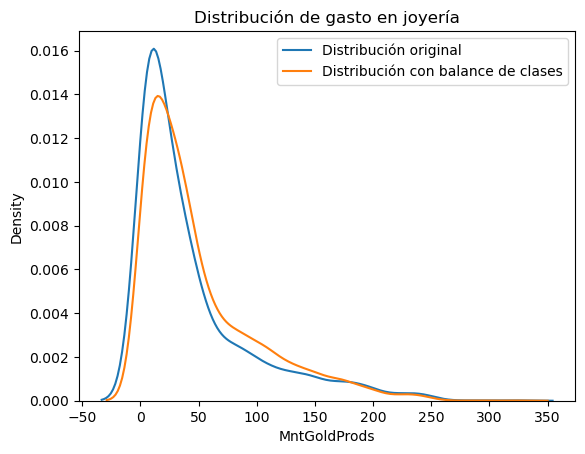

In [22]:
sns.kdeplot(database['MntGoldProds'])
sns.kdeplot(balclass['MntGoldProds'])
plt.legend(['Distribución original','Distribución con balance de clases'])
plt.title('Distribución de gasto en joyería')


In [23]:
data_p2=data_p1.copy()
t2=time.time()
dsint2=smotev2(min_class,min_class['Response'][0],n_ds,5) ## con 3 y 5
t1=time.time()
balclass2=pd.concat([data_p2,dsint2],ignore_index=True)

print('tiempo de ejecución:',t1-t2)

tiempo de ejecución: 91.38653922080994


Text(0.5, 1.0, 'Clases de respuesta a campañas balanceadas k=5')

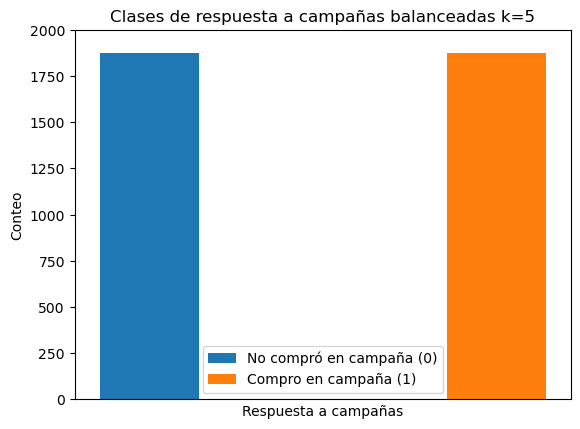

In [24]:
ren,col=balclass2.shape
ncc=[]
cc=[]
for dato in range(ren):
    if balclass['Response'][dato] == 0:
        ncc.append(0)
    else:
        cc.append(1)
col=['No compró en campaña (0)','Compro en campaña (1)']
#plt.figure(figsize=(6,3))
plt.hist([ncc,cc],bins=2,label=col)
plt.xlabel('Respuesta a campañas')
plt.ylabel('Conteo')
plt.axis([0,1,0,2000])
plt.tick_params(bottom=False,labelbottom=False)
plt.legend()
plt.title('Clases de respuesta a campañas balanceadas k=5') # modificar si es posible la escala de los valores

Text(0.5, 1.0, 'Distribución de gasto en vinos con k=5')

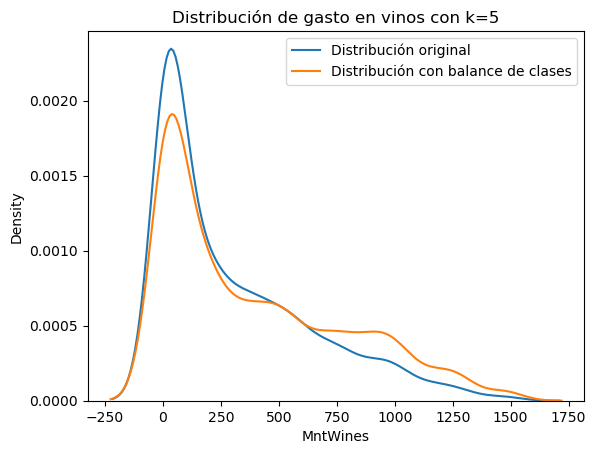

In [25]:
sns.kdeplot(database['MntWines'])
sns.kdeplot(balclass2['MntWines'])
plt.legend(['Distribución original','Distribución con balance de clases'])
plt.title('Distribución de gasto en vinos con k=5')

Text(0.5, 1.0, 'Distribución de gasto en frutas k=5')

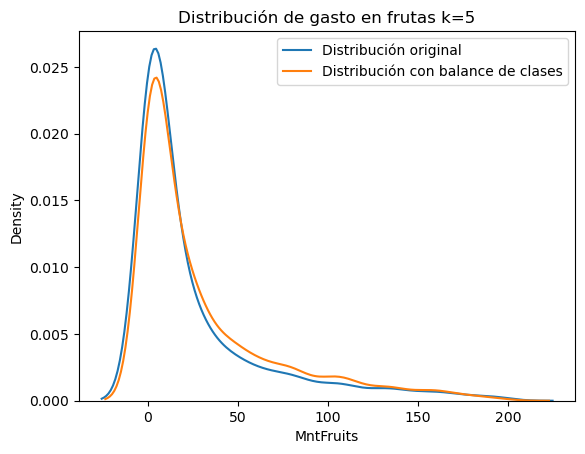

In [26]:
sns.kdeplot(database['MntFruits'])
sns.kdeplot(balclass2['MntFruits'])
plt.legend(['Distribución original','Distribución con balance de clases'])
plt.title('Distribución de gasto en frutas k=5')


Text(0.5, 1.0, 'Distribución de gasto en carnes k=5')

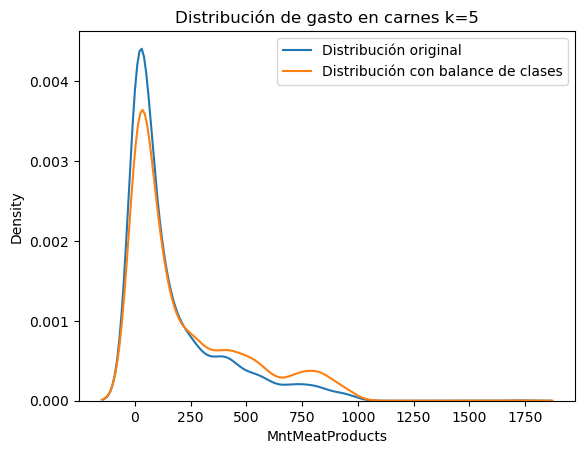

In [27]:
sns.kdeplot(database['MntMeatProducts'])
sns.kdeplot(balclass2['MntMeatProducts'])
plt.legend(['Distribución original','Distribución con balance de clases'])
plt.title('Distribución de gasto en carnes k=5')

Text(0.5, 1.0, 'Distribución de gasto en dulces k=5')

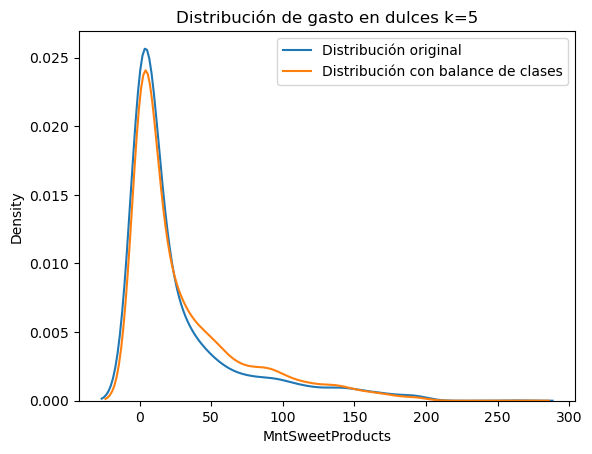

In [28]:
sns.kdeplot(database['MntSweetProducts'])
sns.kdeplot(balclass2['MntSweetProducts'])
plt.legend(['Distribución original','Distribución con balance de clases'])
plt.title('Distribución de gasto en dulces k=5')

Text(0.5, 1.0, 'Distribución de gasto en joyería k=5')

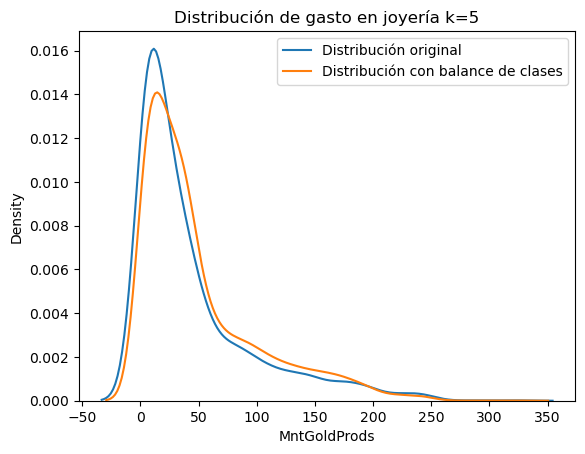

In [29]:
sns.kdeplot(database['MntGoldProds'])
sns.kdeplot(balclass2['MntGoldProds'])
plt.legend(['Distribución original','Distribución con balance de clases'])
plt.title('Distribución de gasto en joyería k=5')